# Download and Prepare Dataset

In [5]:
# permission for the json to act
! chmod 600 /content/kaggle.json

In [6]:
!KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d dqmonn/zalando-store-crawl

 99% 2.23G/2.24G [00:12<00:00, 182MB/s]
100% 2.24G/2.24G [00:12<00:00, 199MB/s]


In [7]:
import zipfile

# Extract the archive
zip_file = zipfile.ZipFile('/content/zalando-store-crawl.zip')
zip_file.extractall('/content/')
zip_file.close()

In [8]:
!rm -rf /content/zalando/zalando

In [9]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import splitfolders
from sklearn.model_selection import train_test_split

input_folder = '/content/zalando'

# Split folders (train, val)
splitfolders.ratio(input_folder, output="/content/zalando2", 
                   seed=42, ratio=(.8, .2), 
                   group_prefix=None) # default values

Copying files: 16186 files [00:05, 3010.48 files/s]


In [11]:
import os

# Sanity check
base_dir = '/content/zalando2/train'

hoodies_dir = os.path.join(base_dir, 'hoodies')
hoodies_female_dir = os.path.join(base_dir, 'hoodies-female')
longsleeve_dir = os.path.join(base_dir, 'longsleeve')
shirt_dir = os.path.join(base_dir, 'shirt')
sweatshirt_dir = os.path.join(base_dir, 'sweatshirt')
sweatshirt_female_dir = os.path.join(base_dir, 'sweatshirt-female')

print('total hoodies image:', len(os.listdir(hoodies_dir)))
print('total hoodies-female image:', len(os.listdir(hoodies_female_dir)))
print('total longsleeve image:', len(os.listdir(longsleeve_dir)))
print('total shirt image:', len(os.listdir(shirt_dir)))
print('total sweatshirt image:', len(os.listdir(sweatshirt_dir)))
print('total sweatshirt-female image:', len(os.listdir(sweatshirt_female_dir)))

# Print first ten images of each class
hoodies_files = os.listdir(hoodies_dir)
print(hoodies_files[:5])

hoodies_female_files = os.listdir(hoodies_female_dir)
print(hoodies_female_files[:5])

longsleeve_files = os.listdir(longsleeve_dir)
print(longsleeve_files[:5])

shirt_files = os.listdir(shirt_dir)
print(shirt_files[:5])

sweatshirt_files = os.listdir(sweatshirt_dir)
print(sweatshirt_files[:5])

sweatshirt_female_files = os.listdir(sweatshirt_female_dir)
print(sweatshirt_female_files[:5])

total hoodies image: 1715
total hoodies-female image: 968
total longsleeve image: 1360
total shirt image: 3832
total sweatshirt image: 3108
total sweatshirt-female image: 1964
['2NA22S08Q-C11@1.1.jpg', 'M0M21J000-Q11@1.1.jpg', 'SO222S07R-C11@10.jpg', 'M0M22S039-Q11@1.1.jpg', 'AL522S013-M11@10.jpg']
['NI121J08U-Q11@12.jpg', 'RO521J06C-C11@10.jpg', 'NL021J04Q-E11@8.jpg', 'HOS21J000-C11@16.jpg', 'DK121J00M-C11@8.jpg']
['TO222O0IW-Q11@17.1.jpg', 'YO122O0ES-A11@8.jpg', 'OB022P006-Q11@12.jpg', 'TOB22O02V-Q11@7.jpg', 'SO222O0O5-K11@11.jpg']
['LEQ22O000-A11@7.jpg', 'TO222O0I2-K11@10.jpg', 'ED122O0EF-C11@10.jpg', 'M0M22O05G-Q11@1.1.jpg', 'JAH22O00D-K11@10.jpg']
['2NA22S08Q-C11@1.1.jpg', 'M0M21J000-Q11@1.1.jpg', 'RE022S00U-A11@10.jpg', 'M0M22S039-Q11@1.1.jpg', 'AL522S013-M11@10.jpg']
['M0Q21J02H-N11@8.jpg', 'NI121J08U-Q11@12.jpg', 'RO521J06C-C11@10.jpg', 'H4421J017-Q11@8.jpg', 'NL021J04Q-E11@8.jpg']


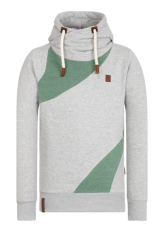

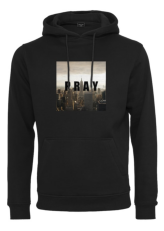

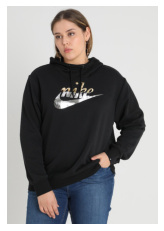

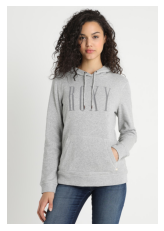

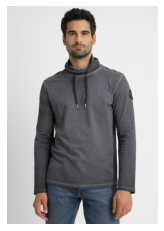

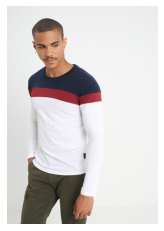

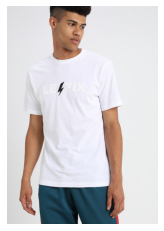

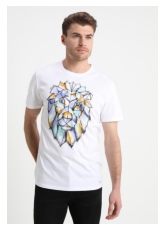

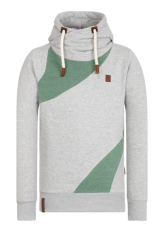

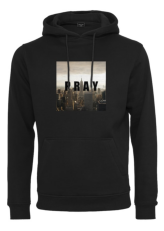

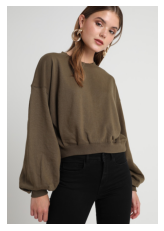

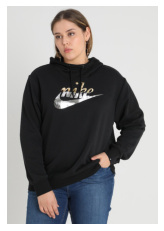

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Show 2 images of each class
pic_index = 2

next_hoodies = [os.path.join(hoodies_dir, fname)
                  for fname in hoodies_files[pic_index-2:pic_index]]
next_hoodies_female = [os.path.join(hoodies_female_dir, fname)
                        for fname in hoodies_female_files[pic_index-2:pic_index]]
next_longsleeve = [os.path.join(longsleeve_dir, fname)
                    for fname in longsleeve_files[pic_index-2:pic_index]]
next_shirt = [os.path.join(shirt_dir, fname)
                for fname in shirt_files[pic_index-2:pic_index]]
next_sweatshirt = [os.path.join(sweatshirt_dir, fname)
                    for fname in sweatshirt_files[pic_index-2:pic_index]]
next_sweatshirt_female = [os.path.join(sweatshirt_female_dir, fname)
                            for fname in sweatshirt_female_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_hoodies+next_hoodies_female+next_longsleeve+next_shirt+next_sweatshirt+next_sweatshirt_female):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# Prepare ImageDataGenerator

In [8]:
# Import ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Training generator initialization

train_generator = ImageDataGenerator(rescale=1./255,
                                     horizontal_flip=True,
                                     vertical_flip=True,
                                     rotation_range=60,
                                     zoom_range=0.3,
                                     fill_mode='nearest')

# Training data generator (batch_size=1200) (class_mode='categorical')
train_data = train_generator.flow_from_directory('/content/zalando2/train',
                                                 target_size=(224, 224),
                                                 batch_size=120,
                                                 class_mode='categorical')

Found 12943 images belonging to 7 classes.


In [10]:
# Validation data generator (batch_size=30) (class_mode='categorical')

val_generator = ImageDataGenerator(rescale=1./255)
val_data = val_generator = val_generator.flow_from_directory('/content/zalando2/val',
                                                             target_size=(224, 224),
                                                             batch_size=33,
                                                             class_mode='categorical')

Found 3237 images belonging to 7 classes.


# Build the model

In [11]:
# Construct 8-layer model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
    # This is the first convolution
    Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    # The second convolution
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The third convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # The fourth convolution
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    Flatten(),
    Dropout(0.5),
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])
# model = Sequential ([
#     Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(2,2),
#     Conv2D(32, (3,3), activation='relu'),
#     MaxPooling2D(3,3),
#     Flatten(),
#     Dense(128, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(6, activation='softmax'),
# ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [13]:
# Compile model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and evaluate the results

In [14]:
# Training model (See step per epoch)

history = model.fit(train_data,
                    steps_per_epoch=100/1,
                    epochs=10,
                    validation_data=val_data,
                    validation_steps=100/1, 
                    verbose=2)

KeyboardInterrupt: ignored

In [ ]:
# plot perubahan nilai loss dan akurasi pada tiap epoch saat training

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nilai Loss pada tiap epoch')